# Parametric Sweep: Data Vectors

In this notebook, we will plot the parametric sweep of the data vectors. We will plot the ratio of each data vector with respect to a reference data vector. The reference data vector is the middle one of each set of 5 data vectors. We will plot the ratio for each of the 5 data vectors in a different color. We will plot the ratio as a function of the multipole moment $\ell$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from processing import helpers as h

In [2]:
data_path = "jmas_data/parametric_sweeps/data_vectors/"
cls_filename = "cls_parametric_sweep.npy"
cls = np.load(f"{data_path}{cls_filename}", allow_pickle=True)
lf_params_list = np.load(f"{data_path}lf_params_list.npy", allow_pickle=True)
ells_filename = "ell_values.npy"
ells = np.load(f"jmas_data/scales_corrs/{ells_filename}")


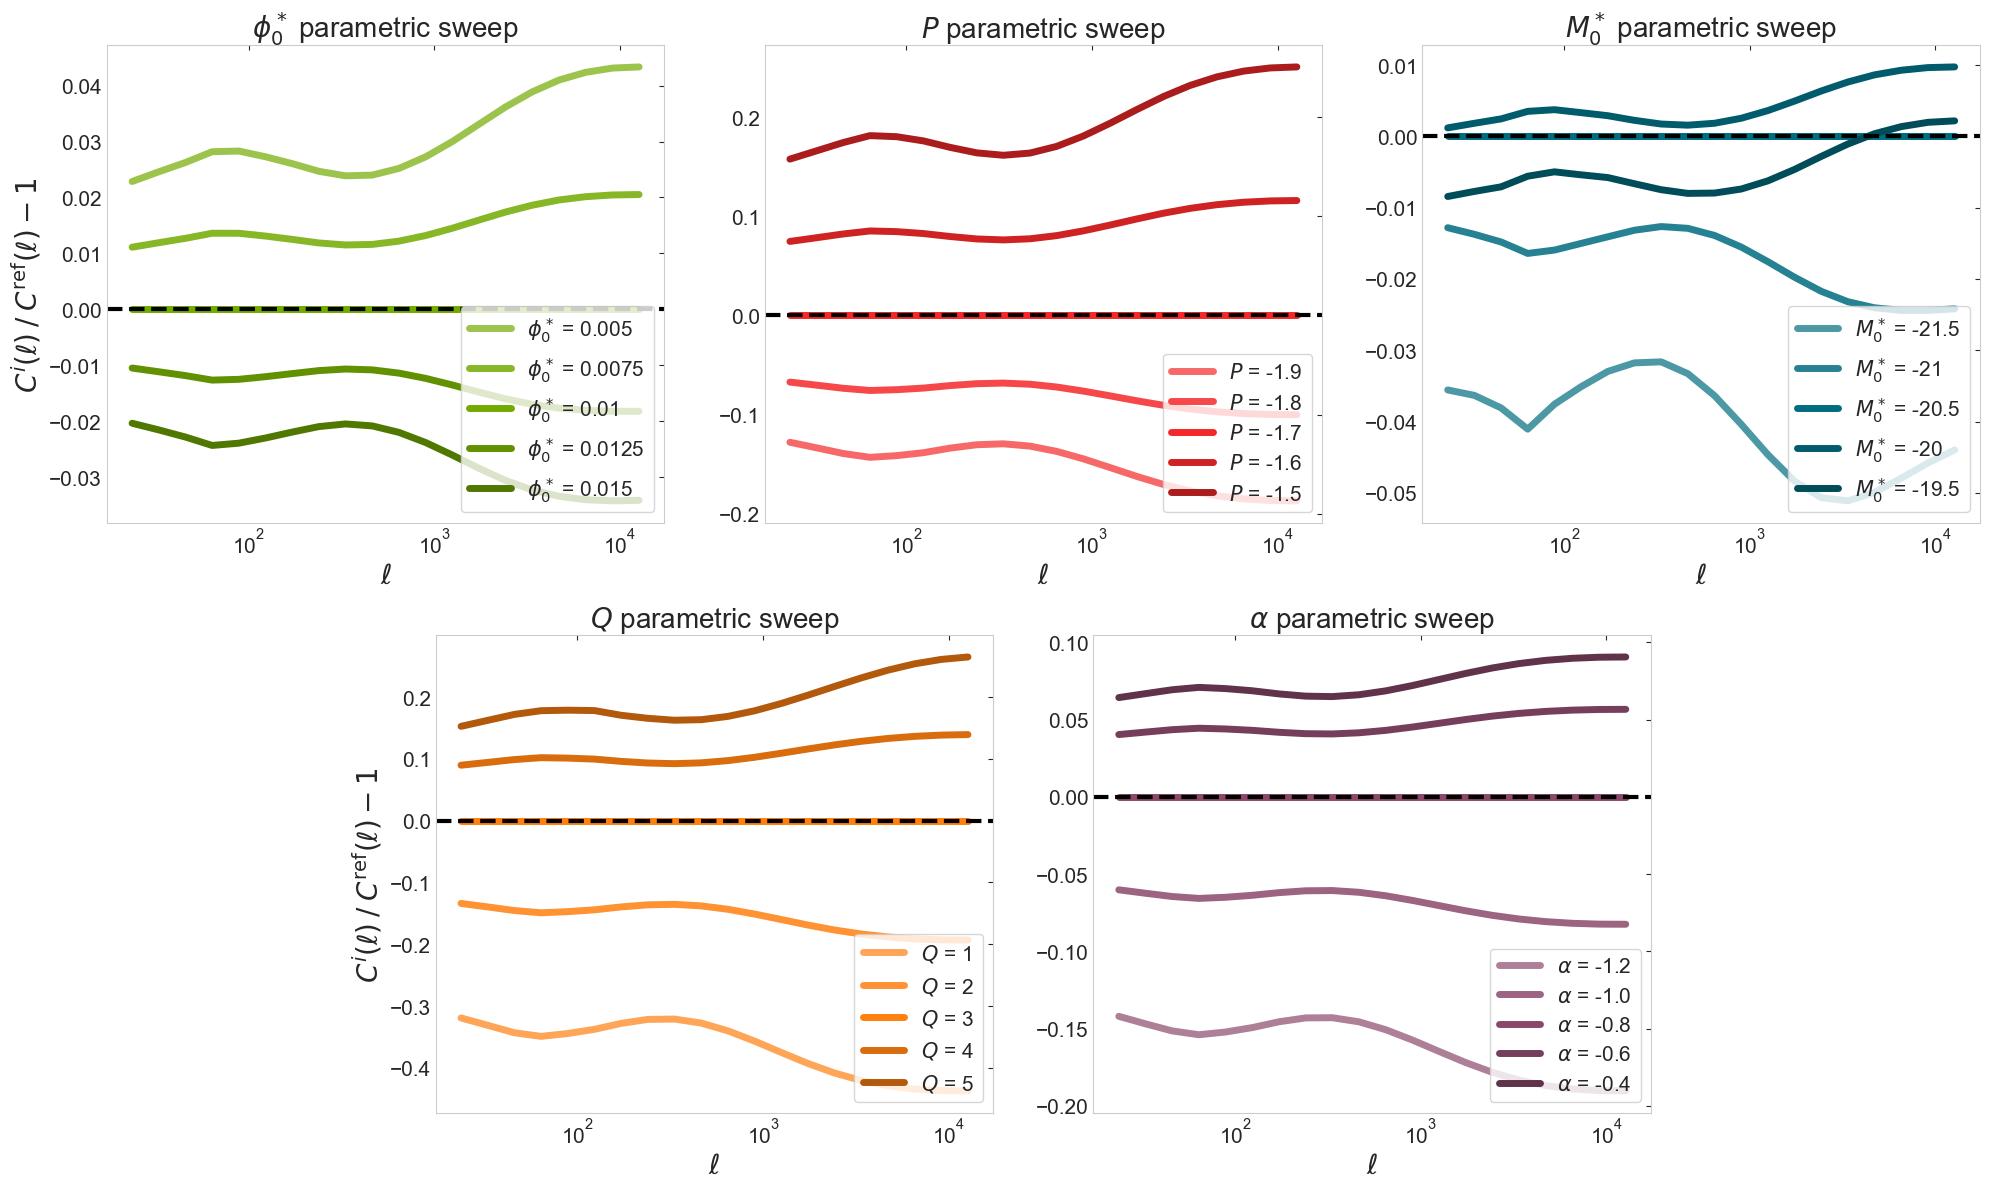

In [3]:
# cls is a list containing the 25 data vectors
# ells the common x-axis values for all cls

# Create the specified subplot layout
fig = plt.figure(figsize=(20, 12))
# remove grid
plt.rcParams['axes.grid'] = False
ax1 = plt.subplot2grid(shape=(2, 6), loc=(0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 6), (0, 2), colspan=2)
ax3 = plt.subplot2grid((2, 6), (0, 4), colspan=2)
ax4 = plt.subplot2grid((2, 6), (1, 1), colspan=2)
ax5 = plt.subplot2grid((2, 6), (1, 3), colspan=2)
axes = [ax1, ax2, ax3, ax4, ax5]
lw = 5
mycolors = h.mycolors
param_labels = ["$\phi_0^*$", "$P$", "$M_0^*$", "$Q$", "$\\alpha$"]

# Loop through each subplot and plot 5 distributions on each
for i, ax in enumerate(axes):
    start_idx = i * 5
    end_idx = start_idx + 5
    datavector_to_plot = cls[start_idx:end_idx]

    # Reference cl (middle one of each set)
    reference_cl = datavector_to_plot[2]

    # Loop through distributions and plot with gradient color
    for idx, cl in enumerate(datavector_to_plot):
        color_idx = i * 5 + idx
        lf_params = lf_params_list[start_idx + idx]

        # Extract the specific lfparam value for this plot
        lfparam_value = lf_params["phi_0_star"] if i == 0 else \
                        lf_params["p"] if i == 1 else \
                        lf_params["m_0_star"] if i == 2 else \
                        lf_params["q"] if i == 3 else \
                        lf_params["alpha"]
            
        params = f"{param_labels[i]} = {lfparam_value} "
        
         # Calculate the ratio with respect to the reference cl
        ratio_cl = cl / reference_cl - 1
        ax.semilogx(ells, ratio_cl, label=params, lw=lw, color=mycolors[color_idx])

    # Add a horizontal line at y=1 (ratio equal to the reference)
    ax.axhline(y=0, color='k', linestyle='--', lw=3,)

    ax.set_title(f"{param_labels[i]} parametric sweep", fontsize=20)
    ax.set_xlabel("$\ell$", fontsize=20) 
    if i in [0, 3]:  # Display y-label only for ax1 and ax4
        ax.set_ylabel("${C^{i} ({\\ell})} \\: / \\: {C^{\\mathrm{ref}} ({\\ell})} - 1$", fontsize=20) 
    ax.tick_params(direction='in', axis='both', which='major', labelsize=15, top=True, right=True)
    ax.legend(frameon=True, fontsize=15, loc=4)
    
# Adjust horizontal spacing between subplots
plt.subplots_adjust(wspace=0.23)
plt.tight_layout()

plot_path = "plots_output/parametric_sweeps/"
plt.savefig(f"{plot_path}lf_parametric_sweep_data_vectors.pdf", bbox_inches="tight")
plt.savefig(f"{plot_path}lf_parametric_sweep_data_vectors.png", bbox_inches="tight", dpi=300)
